Classification of Wisconsin Breast cancer dataset using unsharp measurement based algorithm

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Importing the breast cancer data 

There are 10 attributes to the dataset. The dataset is to be classified into two classes: benign(2) and malignant(4)

In [3]:

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
# using the attribute information as the column names
col_names = ['ID_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli', 'Mitoses', 'Class']
breast_can =  pd.read_csv(csv_url, names = col_names)
# class: (2 for benign, 4 for malignant)



In [4]:
breast_can_features = breast_can.drop(['Class'], axis=1)
breast_can_features = breast_can_features.drop(['ID_number'], axis=1)
breast_can_features = breast_can_features.drop(['Bare_Nuclei'], axis=1)
breast_can_features_1 = breast_can.drop(['Bare_Nuclei'], axis=1)
breast_can_features.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


Doing principle component analysis to reduce the dimensions to 2D

In [5]:
standardized = StandardScaler()
standardized.fit(breast_can_features)
scaled_data = standardized.transform(breast_can_features)
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(699, 2)

In [6]:
# shifting the origin to 5(mainly to avoid the negative co-ordinates)
for i in range(len(x_pca)):
    x_pca[i][0] = x_pca[i][0]+5 # x co-ordinate
    x_pca[i][1] = x_pca[i][1]+5 # y co-ordinate 
print(x_pca)

[[3.69591239 4.85134061]
 [5.91675209 4.80925771]
 [3.46945394 4.97091932]
 ...
 [9.11072197 4.25542157]
 [7.3485653  3.63529756]
 [7.66679031 3.61443528]]


Now we define the similarity measure as Euclidean distance from some origin (0, 0)

In [7]:
# defining similarity measure as Euclidean distance from some origin (0,0)
def distance(x,y):
    return (x**2 + y**2  )**(1)
dist_list = []
for i in range(len(x_pca)):
    dist_list.append(distance(x_pca[i][0],x_pca[i][1]))
print((dist_list))

[37.195274063938356, 58.136915013499376, 36.74714954630644, 60.65788838740623, 38.49548920457039, 105.89044218573737, 36.430190026499204, 37.05478044498605, 68.14899559228041, 37.57479002484029, 34.8755340395263, 36.69503620952062, 45.182788098870475, 36.430190026499204, 105.45588105593896, 60.61566490949828, 36.98398424998982, 36.95481618039431, 71.10778608512031, 37.46852319693857, 85.15559411191134, 77.039193918782, 36.823114605027136, 49.16699020612241, 36.430190026499204, 46.8542112709369, 35.76162795784687, 37.177645144408665, 36.69503620952062, 37.57242103649919, 35.24458068549776, 36.572274161674734, 94.10213822747399, 37.268765781574594, 37.291639254558, 36.69503620952062, 108.214292435441, 37.40625727400441, 58.299070177134965, 57.67209645151802, 82.90237827120752, 58.82278559663515, 96.27385405652134, 69.92325238941018, 108.28021567499516, 43.43376504136661, 64.4152760131992, 36.599749063470284, 38.49548920457039, 72.76140990257164, 78.14723953800781, 45.77750095901401, 68.0

Text(0, 0.5, '$y$')

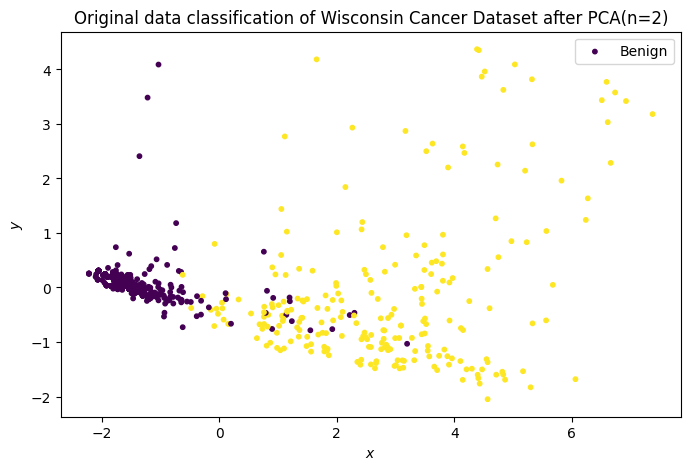

In [8]:
# plotting the data 
def diag(x):
    if x == 4:
        return 1
    else:
        return 0
df_diag = breast_can['Class'].apply(diag)  # determining color code 

#sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(figsize = (8,5))
#ax = fig.add_subplot(111)

plt.scatter(x_pca[:,0]-5, x_pca[:,1]-5,c=df_diag, s = 10)
plt.legend(['Benign'])
#ax.view_init(30,120)
plt.title('Original data classification of Wisconsin Cancer Dataset after PCA(n=2)')
plt.xlabel("$x$")
plt.ylabel("$y$")

Now that we have a tool to quantify the similarity between the data sets, We will convert distances into the binary equivalent of their closest integer for the encoding purpose. 

After that we will represent it as an equally superposed state consisting of all the distances  

In [9]:
# creating an integer list of corresponding distances 
int_dist_list = []
for i in range(len(dist_list)):
    int_dist_list.append(int(dist_list[i]))
#print(int_dist_list)
print(min(int_dist_list))
print(max(int_dist_list))
print(sorted(int_dist_list))

34
220
[34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 

In [10]:
num_qubits = int(np.log2(max(int_dist_list))) + 1
superposed_vector = np.zeros(2**num_qubits,dtype = int)  
for i in range(2**num_qubits):    # i ranges from 0 to 2**N, 2^N also represents the range of distance
    if i in int_dist_list: 
        superposed_vector[i]=1
#supurposed_vector=supurposed_vector/len(supurposed_vector.nonzero()[0])
normalized_vector = np.array([superposed_vector / np.linalg.norm(superposed_vector)])

print(superposed_vector)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Once we create a superposed state, we need to construct effect operators corresponding to each distance measure. 

As we require 8 qubits, we need to construct effect operators of dimension $2^8 \times 2^8$. We will only use one effect operator for clustering 



In [11]:
#delta = 0.5 
def Gaussian(delta, y, x):
    return ((2*np.pi*(delta**2))**(-1/2))*np.exp(-(y-x)**2/(2*delta**2))


In [12]:
y =  38 # one unit distance
delta = 30
#max_distance = 80 units 
#total distances = 128
k = 0 
diagonal = []
E_00000000 =  np.array(np.zeros((256, 256), dtype = int))
for i in range(len(E_00000000[0])):
    #for j in range(len(E_000000[0])):
     #   if i == j:
    diagonal.append( (10**4)*Gaussian(delta,y,i ))
   
#print(diagonal )
for i in range(len(E_00000000[0])):
    for j in range(len(E_00000000[0])):
       if i == j:
        E_00000000[i][j] = diagonal[k]
        k += 1
print(np.diag(E_00000000))
#print(E_0000)  

[ 59  62  64  67  69  72  75  77  80  83  86  88  91  93  96  99 101 104
 106 108 111 113 115 117 119 121 122 124 125 127 128 129 130 131 131 132
 132 132 132 132 132 132 131 131 130 129 128 127 125 124 122 121 119 117
 115 113 111 108 106 104 101  99  96  93  91  88  86  83  80  77  75  72
  69  67  64  62  59  57  54  52  49  47  45  43  41  38  36  35  33  31
  29  27  26  24  23  21  20  19  17  16  15  14  13  12  11  10  10   9
   8   8   7   6   6   5   5   4   4   4   3   3   3   2   2   2   2   1
   1   1   1   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [13]:
k = E_00000000*(superposed_vector.T)
print((np.diag(k)))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 131 132
 132 132 132 132 132 132 131 131 130 129 128 127 125 124 122 121 119 117
 115   0 111 108 106 104 101  99  96  93  91  88   0  83  80  77  75  72
  69  67  64  62  59  57  54  52  49  47  45  43  41  38  36  35  33  31
  29  27  26  24  23   0  20  19  17  16  15  14  13  12  11  10  10   9
   8   0   0   0   0   5   0   4   4   0   0   3   0   0   0   0   0   1
   0   0   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [14]:
cluster = []
for i in range(2**8):
    if 126 < np.diag(k)[i] <= 132:
        cluster.append(i)
print(cluster)

[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [15]:
cluster_2 = []
for i in range(2**8):
    if 0 < np.diag(k)[i] <= 125:
        cluster_2.append(i)
print(cluster_2)

[48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 113, 115, 116, 119, 125, 128, 130]


In [16]:
fin_cluster_1 =[]
fin_cluster_2 =[]
k = []

for j in range(len(dist_list)):
    for i in cluster:
        if i-1 < dist_list[j] < i:
            fin_cluster_1.append(dist_list[j])

for j in range(len(dist_list)):
    for i in cluster_2:
        if i-1 < dist_list[j] < i:
            fin_cluster_2.append(dist_list[j])

fin_cluster_1.sort()
fin_cluster_2.sort()

for i in (dist_list):
    if i not in fin_cluster_1 and i not in fin_cluster_2:
        k.append(i)

#print((k))

for i in range(len(k)):
    if k[i] > max(cluster):
        fin_cluster_2.append(k[i])
    else:
        fin_cluster_1.append(k[i])
#print(((fin_cluster_1)))
#print((set(fin_cluster_2)))
#print(((fin_cluster_3)))
#print((set(fin_cluster_4)))

In [17]:
cl = []
cl1 = []
cl2 = []
for j in range(len(fin_cluster_1)):
    for i in range(len(dist_list)):
        if distance(x_pca[i][0],x_pca[i][1]) == fin_cluster_1[j]  :
            cl.append(x_pca[i][0]-5)
            cl1.append(x_pca[i][1]-5)
           # cl2.append(x_pca[i][2])

In [18]:
cl_1 = []
cl1_1 = []
cl2_1 = []
for j in range(len(fin_cluster_2)):
    for i in range(len(dist_list)):
        if distance(x_pca[i][0],x_pca[i][1]) == fin_cluster_2[j]  :
            cl_1.append(x_pca[i][0]-5)
            cl1_1.append(x_pca[i][1]-5)
           # cl2_1.append(x_pca[i][2])

Text(0, 0.5, '$y$')

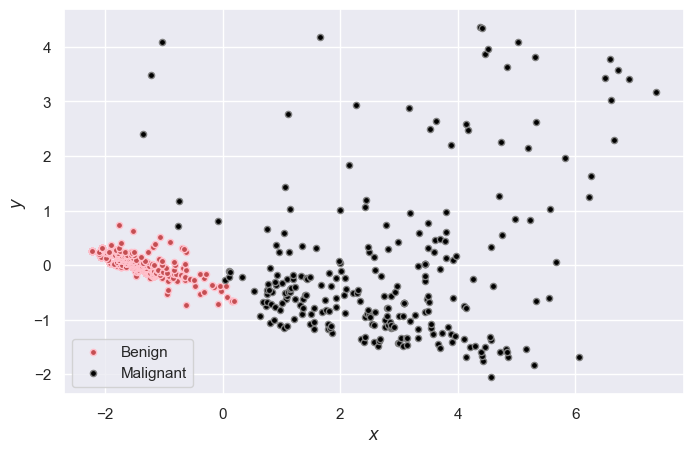

In [19]:
sns.set_theme()
plt.figure(figsize = (8,5))

#ax = fig.add_subplot(111, projection = '3d')
#ax.scatter(cl, cl1,cl2,c='g', s = 60)
#ax.scatter(cl_1, cl1_1,cl2_1,c='g', s = 60)
plt.scatter(cl, cl1,c='r', s = 20,edgecolors='pink',label = 'Benign')
plt.scatter(cl_1, cl1_1,c='black', s = 20,edgecolors='grey',label = 'Malignant')
#ax.scatter(cl_4, cl1_4,cl2_4,c='y', s = 60)
plt.legend()
#ax.view_init(30,120)
#plt.title('Classification of Wisconsin Cancer Dataset after PCA(n=2)')
plt.xlabel("$x$")
plt.ylabel("$y$")